In [84]:
# Importing necessary libraries
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk import ngrams
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

In [85]:
# Downloading necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Axler\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Axler\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [86]:
# Load the dataset
df = pd.read_csv('spam email dataset/email_classification.csv')


In [87]:
# Define custom stopwords
custom_stopwords = set([
    "You","you", "Your", "your", "We", "we", "to", ".", "?", "!", "has", "been", "for", "a", "of",
    "You've", "you've", "Our", "our", "Don't", "don't", "We're", "we're", "us", "Her", "her", "His", "his", "with", "Here's", "here's", "let", "know"
])

In [88]:
# Function to separate words combined with ! and ?
def separate_combined_words(text):
    words = text.split()
    separated_words = []
    for word in words:
        if '!' in word:
            separated_words.append(word.replace('!', ''))
            separated_words.append('!')
        elif '?' in word:
            separated_words.append(word.replace('?', ''))
            separated_words.append('?')
        elif '.' in word:
            separated_words.append(word.replace('.', ''))
            separated_words.append('.')
        else:
            separated_words.append(word)
    return ' '.join(separated_words)

# Apply the function to the email column
df['email'] = df['email'].apply(separate_combined_words)

In [89]:
# Function to remove stopwords from text
def remove_stopwords(text):
    words = text.split()
    return ' '.join([word for word in words if word.lower() not in custom_stopwords])

# Create a cleaned_email column by applying the remove_stopwords function
df['cleaned_email'] = df['email'].apply(remove_stopwords)

In [90]:
# Function to create n-grams
def create_ngrams(text, n):
    tokens = nltk.word_tokenize(text)
    return list(ngrams(tokens, n))

In [91]:
# Create bigrams and trigrams
bigrams = []
trigrams = []

In [92]:
# loop through each email in the cleaned_email column
for email in df['cleaned_email']:
    tokens = email.lower().split()  # Convert to lowercase
    bigrams.extend(ngrams(tokens, 2))
    trigrams.extend(ngrams(tokens, 3))

# Count the frequency of bigrams and trigrams
bigrams_freq = Counter(bigrams)
trigrams_freq = Counter(trigrams)

# Get the most common bigrams and trigrams
most_common_bigrams = bigrams_freq.most_common(10)
most_common_trigrams = trigrams_freq.most_common(10)

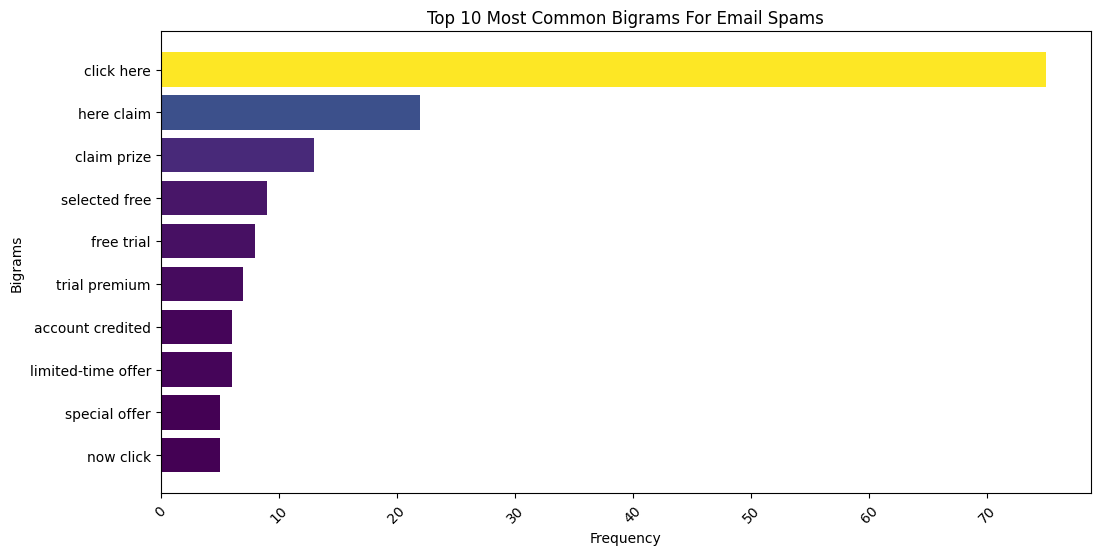

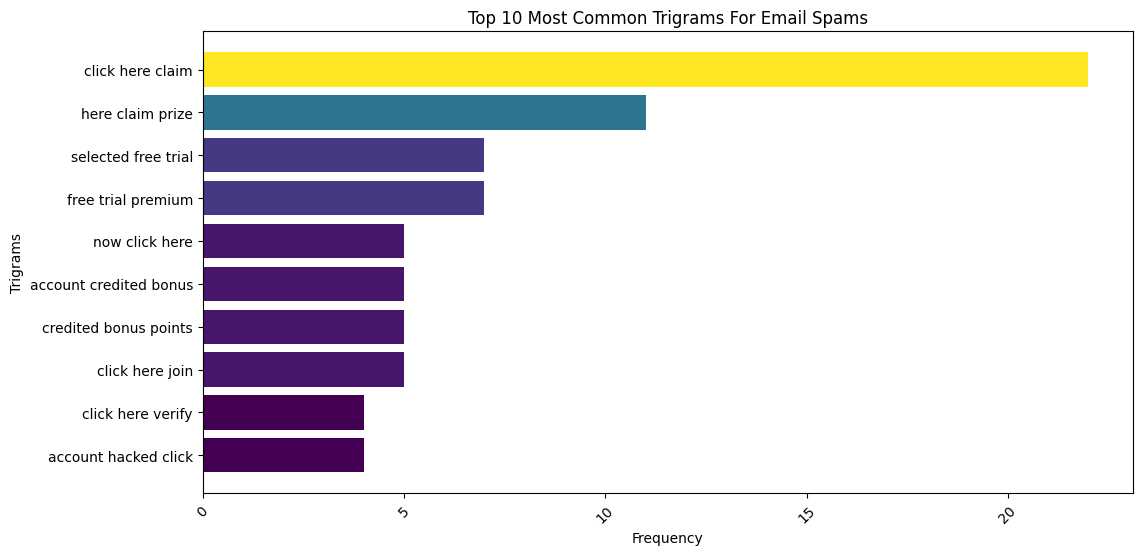

Most common bigrams: [(('click', 'here'), 75), (('here', 'claim'), 22), (('claim', 'prize'), 13), (('selected', 'free'), 9), (('free', 'trial'), 8), (('trial', 'premium'), 7), (('account', 'credited'), 6), (('limited-time', 'offer'), 6), (('special', 'offer'), 5), (('now', 'click'), 5)]
Most common trigrams: [(('click', 'here', 'claim'), 22), (('here', 'claim', 'prize'), 11), (('selected', 'free', 'trial'), 7), (('free', 'trial', 'premium'), 7), (('now', 'click', 'here'), 5), (('account', 'credited', 'bonus'), 5), (('credited', 'bonus', 'points'), 5), (('click', 'here', 'join'), 5), (('click', 'here', 'verify'), 4), (('account', 'hacked', 'click'), 4)]


In [94]:
# Get frequencies for the most common bigrams
frequencies_bigrams = [freq for _, freq in most_common_bigrams]
# Get frequencies for the most common trigrams
frequencies_trigrams = [freq for _, freq in most_common_trigrams]

# Create a colormap
cmap = plt.get_cmap('viridis')  # A popular colormap for visualizations

# Normalize frequencies to the range [0, 1] for color mapping
norm_bigrams = plt.Normalize(min(frequencies_bigrams), max(frequencies_bigrams))
norm_trigrams = plt.Normalize(min(frequencies_trigrams), max(frequencies_trigrams))

# Create a color array based on the normalized frequencies
colors_bigrams = [cmap(norm_bigrams(freq)) for freq in frequencies_bigrams]
colors_trigrams = [cmap(norm_trigrams(freq)) for freq in frequencies_trigrams]

# Sort bigrams and trigrams by frequency in descending order
sorted_bigrams = sorted(most_common_bigrams, key = lambda x: x[1], reverse = True)
sorted_trigrams = sorted(most_common_trigrams, key = lambda x: x[1], reverse = True)

# Get sorted frequencies and n-grams
sorted_frequencies_bigrams = [freq for _, freq in sorted_bigrams]
sorted_frequencies_trigrams = [freq for _, freq in sorted_trigrams]
sorted_bigrams = [' '.join(bigrams) for bigrams, _ in sorted_bigrams]
sorted_trigrams = [' '.join(trigrams) for trigrams, _ in sorted_trigrams]

# Visualization of bigrams
plt.figure(figsize=(12, 6))
plt.barh(sorted_bigrams, sorted_frequencies_bigrams, color = colors_bigrams)
plt.title('Top 10 Most Common Bigrams For Email Spams')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top
plt.show()

# Visualization of trigrams
plt.figure(figsize=(12, 6))
plt.barh(sorted_trigrams, sorted_frequencies_trigrams, color = colors_trigrams)
plt.title('Top 10 Most Common Trigrams For Email Spams')
plt.xlabel('Frequency')
plt.ylabel('Trigrams')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top
plt.show()

#Show the frequency of the most common bigrams and trigrams
print('Most common bigrams:', most_common_bigrams)
print('Most common trigrams:', most_common_trigrams)

In [97]:
# Create a dataframe for the bigrams and trigrams
bigrams_df = pd.DataFrame(most_common_bigrams, columns = ['bigrams', 'frequency'])
trigrams_df = pd.DataFrame(most_common_trigrams, columns = ['trigrams', 'frequency'])

# Print the bigrams and trigrams dataframes
print(bigrams_df)
print(trigrams_df)

                 bigrams  frequency
0          (click, here)         75
1          (here, claim)         22
2         (claim, prize)         13
3       (selected, free)          9
4          (free, trial)          8
5       (trial, premium)          7
6    (account, credited)          6
7  (limited-time, offer)          6
8       (special, offer)          5
9           (now, click)          5
                     trigrams  frequency
0        (click, here, claim)         22
1        (here, claim, prize)         11
2     (selected, free, trial)          7
3      (free, trial, premium)          7
4          (now, click, here)          5
5  (account, credited, bonus)          5
6   (credited, bonus, points)          5
7         (click, here, join)          5
8       (click, here, verify)          4
9    (account, hacked, click)          4
